In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2415,ham,Huh means computational science... Y they like...,NaN,NaN,NaN
900,ham,Probably money worries. Things are coming due ...,NaN,NaN,NaN
631,ham,Thank u!,NaN,NaN,NaN
3064,ham,"Sounds good, keep me posted",NaN,NaN,NaN
1195,spam,You have 1 new voicemail. Please call 08719181503,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**Now lets start working with the data and make some amazing conclusions**

## 1. Data Cleaning
## 2. EDA
## 3. Data Preprocessing --vectorization,stemming,remove stop words
## 4. Model Building
## 5. Evaluate the model
## 6. Improve the model
## 7. Website
## 8. Deployment on Heroku


# *1. Data Cleaning*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# the above information shows that columns 2 3 4 have too much null values so it is good to drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
#inplace= True because we permanently want to bring change in the original dataset
df.sample(5)

,v1,v2
981,ham,Reckon need to be in town by eightish to walk ...
975,ham,Hey no I ad a crap nite was borin without ya 2...
1534,ham,Remember on that day..
64,ham,Ok lar i double check wif da hair dresser alre...
626,ham,How many licks does it take to get to the cent...


In [7]:
# as the column names are not to descriptive lets rename the names of the columns
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [8]:
df.sample(5)

,message_type,message
3359,ham,Please attend the phone:)
3309,ham,Oh ho. Is this the first time u use these type...
532,ham,Gudnite....tc...practice going on
2005,ham,Can't take any major roles in community outrea...
5387,ham,I will be gentle baby! Soon you will be taking...


In [9]:
# in the message type, they are classified as 'ham' and 'spam' but we want it as 1 and O so lets import Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [11]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

5459    0
5349    0
5527    0
2531    0
2360    0
Name: message_type, dtype: int64

In [12]:
df[df['message_type']==1]
# there are 747 spam messages in the dataset

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [13]:
#now lets check the missing values
df.isnull().sum()
# there are no missing values

message_type    0
message         0
dtype: int64

In [14]:
# now lets check for duplicated values
df.duplicated().sum()


403

*There are 403 duplicate values so we simply have to remove those values* 

In [15]:
#remove the duplicates
df= df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

# 2. Exploratory Data Analysis

### *Lets visualize this classification problem to get a better understanding of the data*

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

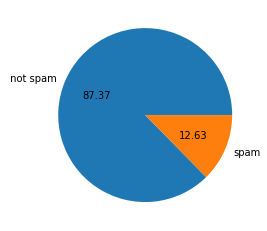

In [19]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

### there is imbalance in data

In [20]:
# no. of alphabets in the data
# no. of sentences in the data
# no. of words in the data

### *Now lets make 3 new columns in the data depicting the no. of characters,words and sentences*

In [21]:
#natural language tool kit
import nltk

In [22]:
#find the number of alpha numeric characters in the messages column
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
#word tokenization
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [24]:
#now find the length of each of the list to get the total number of words in each list
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
4426,0,So what did the bank say about the money?,41,10
5515,0,You are a great role model. You are giving so ...,245,61
4311,0,I keep ten rs in my shelf:) buy two egg.,40,13
2652,0,No need for the drug anymore.,29,7
3249,0,"Babe, I need your advice",24,6


In [25]:
#finding number of sentences
df['num_sentences']=df['message'].apply(lambda x: nltk.sent_tokenize(x))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
5250,1,Urgent! Please call 09061213237 from a landlin...,127,28,"[Urgent!, Please call 09061213237 from a landl..."
3293,0,Beautiful tomorrow never comes.. When it comes...,151,27,"[Beautiful tomorrow never comes.., When it com..."
2445,0,The guy (kadeem) hasn't been selling since the...,183,42,[The guy (kadeem) hasn't been selling since th...
2788,0,ÌÏ got wat to buy tell us then Ì_ no need to c...,59,16,[ÌÏ got wat to buy tell us then Ì_ no need to ...
868,1,Hello. We need some posh birds and chaps to us...,134,32,"[Hello., We need some posh birds and chaps to ..."


In [26]:
#finding no. of sentences
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
5274,0,"Hi. Hope ur day * good! Back from walk, table ...",101,26,4
394,0,Pick you up bout 7.30ish? What time are and t...,56,13,2
3822,0,Please protect yourself from e-threats. SIB ne...,159,27,3
2931,0,Only 2% students solved this CAT question in '...,183,56,2
1377,1,Double Mins & Double Txt & 1/2 price Linerenta...,159,26,3


In [27]:
#lets test the describe function on the new 3 columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000
